<img src = 'https://bancariosbh.org.br/manager/resources/uploads/213/350_198_8e66ca00d7dfdfbd00096a7c220be22c.jpg' height="200" width="340">
<p><b><font size = 5 face = 'verdana'> TAREFA AVALIATIVA 2 - PROCESSAMENTO DE LINGUAGEM NATURAL</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de PROCESSAMENTO DE LINGUAGEM NATURAL do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSORA:</b> BARBARA SILVEIRA FRAGA<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>
<hr></hr>

<b>TÓPICOS ABORDADOS:</b><br>
<li>Definição do Corpus;</li>
<li>Preprocessamento;</li>
<li>Representação Textual;</li>
<li>TD-IDF;</li>
<li>Bag of Words;</li>
<li>Embedding;</li>
<li>Visualização;</li>
<li>PCA;</li>
<li>TSNE;</li>
<li>UMAP.</li>


In [ ]:
!pip install nltk==3.5
!pip install gensim
!pip install umap-learn
!pip install wikipedia
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.2 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434692 sha256=7334c8ee6c8763d7702a392fcc6f29fa7660277448222ac90b1990a815be946a
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 27.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=6c2b95d016d4e58aeb3b1bff461ff3b270e9df1abe641af0d7b137bde6e5b518
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=1ce6b40b758c4fa52e243422cf859f9bfa6c545d0f140790b02586d958a321ae
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel

In [ ]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import wikipedia
import string
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import urllib.request
import bz2
import gensim
import warnings
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Definição do Corpus

## Base

In [ ]:
wikipedia.set_lang("pt")
bh = wikipedia.page("Belo Horizonte")

In [ ]:
corpus = bh.content

Selecionamos algumas frases do corpus de BH da wikipedia.

Conside a lista abaixo como nosso corpus de documentos. Cada elemento da lista, considere como um único documento.

In [ ]:
documentos = \
["Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais",
"A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística",
"Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina",
"Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político",
"Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais"]

## Preprocessamento

<b> Atividade </b>

1) Escreva uma método que realiza o pré-processamento da lista de <b>documentos</b>.

O método deve, para cada documento:
- tokenizar cada palavra
- remover stopwords
- remover números
- remover pontuções
- remover acentos

In [ ]:
def pre_processamento_texto(corpus):
  print('documento')
  print('#tokenização')
  corpus_alt = re.findall(r'\w+(?:\w+)?|[^\w\s]', corpus)
  corpus_alt = [t.lower() for t in corpus_alt]
  print('#Remove Stopwords')
  portugues_stops = stopwords.words('portuguese')
  corpus_alt = [t for t in corpus_alt if t not in portugues_stops]
  print('#remove numeros')
  corpus_alt = [re.sub(r'\d','',t) for t in corpus_alt]
  print('#remove pontuação')
  corpus_alt =[t for t in corpus_alt if t not in string.punctuation]
  print('#remove acentos')
  corpus_alt = [unicode(t) for t in corpus_alt]
  return corpus_alt

In [ ]:
# Fiz o download das stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Foi necessário fazer a importação do sys porque estava dando erro 
# 'unicode' is not defined
import sys
if sys.version_info[0] >= 3:
    unicode = str

In [ ]:
# Fazendo o pré-processamento do texto
corpus_processado = [pre_processamento_texto(doc) for doc in documentos]

documento
#tokenização
#Remove Stopwords
#remove numeros
#remove pontuação
#remove acentos
documento
#tokenização
#Remove Stopwords
#remove numeros
#remove pontuação
#remove acentos
documento
#tokenização
#Remove Stopwords
#remove numeros
#remove pontuação
#remove acentos
documento
#tokenização
#Remove Stopwords
#remove numeros
#remove pontuação
#remove acentos
documento
#tokenização
#Remove Stopwords
#remove numeros
#remove pontuação
#remove acentos


In [ ]:
# Abaixo as palavras foram tokenizadas
# Sem stopword, sem acentos, pontuações e sem números
corpus_processado

[['belo',
  'horizonte',
  'município',
  'brasileiro',
  'capital',
  'estado',
  'minas',
  'gerais'],
 ['populacao',
  'belo',
  'horizonte',
  'estimada',
  'habitantes',
  'conforme',
  'estimativas',
  'instituto',
  'brasileiro',
  'geografia',
  'estatística'],
 ['belo',
  'horizonte',
  'indicada',
  'population',
  'crisis',
  'commitee',
  'onu',
  'metrópole',
  'melhor',
  'qualidade',
  'vida',
  'américa',
  'latina'],
 ['belo',
  'horizonte',
  'mundialmente',
  'conhecida',
  'exerce',
  'significativa',
  'influência',
  'nacional',
  'internacional',
  'ponto',
  'vista',
  'cultural',
  'econômico',
  'político'],
 ['belo',
  'horizonte',
  'capital',
  'segundo',
  'estado',
  'populoso',
  'brasil',
  'minas',
  'gerais']]

# Representação Textual

### Phrases - Gensim

Forma mais inteligente de calcular os bigrams. Ela calcula os bigramas levando em consideração a frequência do par das palavaras em todos os documentos.
Para isso ele treina um modelo e depois aplica no corpus.

```python
#treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
#calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]
```

<b> Atividade </b>

2) Faça um código que treine os bigrams, sendo que o <b>min_count = 1</b>. 
O <b>min_count</b> é a contagem mínima que aquele par de palavras deve aparecer junto para considerarmos com um token. Teste também com outros valores de mim_count. Depois imprima os bigramas de cada documento.
Use o corpus_processado.

In [ ]:
# treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
# calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]

In [ ]:
# Para visualizar resultado utilizo o código abaixo
for i in range(0,5):
  print(bigram_corpus[i])
  print('\n')

['belo_horizonte', 'município', 'brasileiro', 'capital', 'estado', 'minas_gerais']


['populacao', 'belo_horizonte', 'estimada', 'habitantes', 'conforme', 'estimativas', 'instituto', 'brasileiro', 'geografia', 'estatística']


['belo_horizonte', 'indicada', 'population', 'crisis', 'commitee', 'onu', 'metrópole', 'melhor', 'qualidade', 'vida', 'américa', 'latina']


['belo_horizonte', 'mundialmente', 'conhecida', 'exerce', 'significativa', 'influência', 'nacional', 'internacional', 'ponto', 'vista', 'cultural', 'econômico', 'político']


['belo_horizonte', 'capital', 'segundo', 'estado', 'populoso', 'brasil', 'minas_gerais']




## TD-IDF

Dica de leitura: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XklQxnVKj7c

Para representar o texto com TF-IDF utilizamos o TfidfVectorizer. A seguir apresentamos instruções sobre como utilizá-lo.

```python
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(docs)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos. 
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

#Para visualizar as features capturadas pelo TF-IDF utilize:
print(vect.get_feature_names())
#Para visualizar os vetores correspondentes a cada palavara utilize:
df = pd.DataFrame(docs_tdidf.T.todense(), index=vect.get_feature_names(), columns=["doc"+str(i+1) for i in range(0,len(docs))])
df
```

<b> Atividade: </b>

3) Faça o TDIFTVectorizer nos documentos da variável <b>documentos</b> sem alterar nenhum parâmetro. 

In [ ]:
# Fiz a criação do objeto
vect = TfidfVectorizer()

In [ ]:
vetor_tfidf = vect.fit_transform(documentos)

<b> Atividade </b>

4) Imprima o shape do resultado da atividade 4

In [ ]:
# Abaixo vemos o exemplo de execução
# Gerou uma matrix de 5 linhas e 59 colunas
# Tenho 5 linhas com 5 frases que estou representando
# Para 59 features
vetor_tfidf

<5x59 sparse matrix of type '<class 'numpy.float64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [ ]:
# Para fazer a visualização de todos os tokens gerados
vect.get_feature_names()

['501',
 '576',
 'américa',
 'até',
 'belo',
 'brasil',
 'brasileiro',
 'capital',
 'com',
 'commitee',
 'como',
 'conforme',
 'conhecida',
 'crisis',
 'cultural',
 'da',
 'de',
 'do',
 'econômico',
 'em',
 'estado',
 'estatística',
 'estimada',
 'estimativas',
 'exerce',
 'foi',
 'geografia',
 'gerais',
 'habitantes',
 'horizonte',
 'indicada',
 'influência',
 'instituto',
 'internacional',
 'já',
 'latina',
 'mais',
 'melhor',
 'metrópole',
 'minas',
 'mundialmente',
 'município',
 'na',
 'nacional',
 'onu',
 'ou',
 'pelo',
 'político',
 'ponto',
 'populacao',
 'population',
 'populoso',
 'qualidade',
 'segundo',
 'seja',
 'significativa',
 'um',
 'vida',
 'vista']

In [ ]:
# Verificando o tamanho, nesse caso temos 59 features que foram geradas
len(vect.get_feature_names())

59

<b> Atividade </b>

5) Imprima as features capturadas em 4.

In [ ]:
# Para fazer a visualização de todos os tokens gerados
vect.get_feature_names()

['501',
 '576',
 'américa',
 'até',
 'belo',
 'brasil',
 'brasileiro',
 'capital',
 'com',
 'commitee',
 'como',
 'conforme',
 'conhecida',
 'crisis',
 'cultural',
 'da',
 'de',
 'do',
 'econômico',
 'em',
 'estado',
 'estatística',
 'estimada',
 'estimativas',
 'exerce',
 'foi',
 'geografia',
 'gerais',
 'habitantes',
 'horizonte',
 'indicada',
 'influência',
 'instituto',
 'internacional',
 'já',
 'latina',
 'mais',
 'melhor',
 'metrópole',
 'minas',
 'mundialmente',
 'município',
 'na',
 'nacional',
 'onu',
 'ou',
 'pelo',
 'político',
 'ponto',
 'populacao',
 'population',
 'populoso',
 'qualidade',
 'segundo',
 'seja',
 'significativa',
 'um',
 'vida',
 'vista']

6) Imprima os vetores correspondentes a cada palavra de cada documento.

In [ ]:
vect.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.        ,
       2.09861229, 1.69314718, 1.69314718, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 1.18232156, 1.18232156, 2.09861229, 2.09861229,
       1.69314718, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 1.69314718, 2.09861229, 1.        ,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.69314718,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229])

## Bag of Words

Para representar o bag of words utilizamos o CountVectorizer

```python
#primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

```

<b> Atividade </b>

7) Faça o CountVectorizer nos documentos da variável <b>documentos</b> considerando binary = True

In [ ]:
# primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

CountVectorizer(binary=True)

In [ ]:
# Bem parecido com o tfidf - gerou uma matriz de 5 linhas e 59 colunas
vetor = vect_bag.fit_transform(documentos)
vetor

<5x59 sparse matrix of type '<class 'numpy.int64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [ ]:
# Visualização da matrix de zero e um
vetor.todense()

matrix([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
         1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 

<b> Atividade </b>

8) Imprima o índice correspondente a cada token da lista retornada por vect_bag.get_feature_names()

In [ ]:
# Visualização do indice correspondente a cada token da lista
df = pd.DataFrame(vetor.T.todense(), index=vect_bag.get_feature_names(), columns=['docs'+str(i+1) for i in range(0, len(documentos))])
df

,docs1,docs2,docs3,docs4,docs5
501,0,1,0,0,0
576,0,1,0,0,0
américa,0,0,1,0,0
até,0,0,0,1,0
belo,1,1,1,1,1
brasil,0,0,0,0,1
brasileiro,1,1,0,0,0
capital,1,0,0,0,1
com,0,0,1,0,0
commitee,0,0,1,0,0


In [ ]:
# Fazendo a transposição do dataframe é possível identificar quantas vezes uma palavra aparece
# Nesse caso, por exemplo a palavra belo, aparece 5 vezes
df.T

,501,576,américa,até,belo,brasil,brasileiro,capital,com,commitee,...,populacao,population,populoso,qualidade,segundo,seja,significativa,um,vida,vista
docs1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
docs2,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
docs3,0,0,1,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
docs4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
docs5,0,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
documentos

['Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais',
 'A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística',
 'Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina',
 'Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político',
 'Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais']

## Embedding

### Utilizando um embedding treinado

<b> Atividade </b>

9) Faça download do seguinte arquivo, realize a leitura deste arquivo e carregue o modelo: 
https://drive.google.com/file/d/1f5sNZcV8LDam4zxbHnkm472r3r8D_UpX/view?usp=sharing

Depois suba no seu drive e carregue,

obs.: como o embedding é pesado, demora um pouco para carregar, cerca de 4 minutos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#opção 1 -> montar o drive no colab e acessar o arquivo de embedding do drive
from google.colab import drive
drive.mount('/content/drive')

#opção 2 -> fazer download e fazer upload por aqui
#from google.colab import files
#uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
# carregar
##na variável path coloque o caminho do embedding baixado:
path = "/content/drive/MyDrive/PUC Minas/Materias/PROCESSAMENTO DE LINGUAGEM NATURAL/Aula 2/ptwiki_20180420_100d.txt"
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(path, binary=False)

CPU times: user 1min 3s, sys: 2.17 s, total: 1min 5s
Wall time: 1min 10s


<b> Atividade </b>

10) Imprima os vetores das palavras "nlp" e "computacao"

```python
#exemplo de retorno do vetor
word_vectors[__]
```

In [ ]:
# Visualizando os vetores 
word_vectors.vocab

{'de': <gensim.models.keyedvectors.Vocab at 0x7f1737912c10>,
 'é': <gensim.models.keyedvectors.Vocab at 0x7f1737a167d0>,
 'da': <gensim.models.keyedvectors.Vocab at 0x7f1737912090>,
 'e': <gensim.models.keyedvectors.Vocab at 0x7f1737b3ee90>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f17379127d0>,
 'em': <gensim.models.keyedvectors.Vocab at 0x7f1737b3e690>,
 'do': <gensim.models.keyedvectors.Vocab at 0x7f1737912a10>,
 'uma': <gensim.models.keyedvectors.Vocab at 0x7f1737b3ebd0>,
 'um': <gensim.models.keyedvectors.Vocab at 0x7f1737912750>,
 'o': <gensim.models.keyedvectors.Vocab at 0x7f1737b3e250>,
 'no': <gensim.models.keyedvectors.Vocab at 0x7f1737912a50>,
 'na': <gensim.models.keyedvectors.Vocab at 0x7f1737b3e6d0>,
 'por': <gensim.models.keyedvectors.Vocab at 0x7f1737912d90>,
 'foi': <gensim.models.keyedvectors.Vocab at 0x7f1737b3e190>,
 'com': <gensim.models.keyedvectors.Vocab at 0x7f1737912790>,
 'que': <gensim.models.keyedvectors.Vocab at 0x7f1737b3e910>,
 'se': <gensim.models.k

In [ ]:
# Imprimindo os vetores que conten "nlp" e "computacao"
word_vectors['nlp','computacao']

array([[ 0.8528,  0.1094, -0.0296, -0.0458, -0.2029, -0.1839, -0.2012,
        -0.111 , -0.0315,  0.1895, -0.2194, -0.3496, -0.1319, -0.1594,
         0.1549, -0.493 ,  0.1897, -0.296 ,  0.0026,  0.2015,  0.0215,
         0.2946, -0.2024,  0.3931,  0.143 ,  0.0667, -0.4868,  0.048 ,
        -0.1028,  0.2372,  0.2042, -0.8025, -0.1221,  0.475 , -0.2997,
         0.219 ,  0.1232, -0.2118,  0.5402, -0.0768,  0.2253,  0.1285,
        -0.6157,  0.1777,  0.0306, -0.1094, -0.1649, -0.386 , -0.2692,
         0.3149,  0.0391, -0.0821, -0.2238,  0.033 ,  0.5032,  0.0836,
         0.1834, -0.2009, -0.0722, -0.1744,  0.3946, -0.0792, -0.0863,
         0.3813,  0.5876, -0.4447, -0.5435,  0.1528, -0.1012, -0.0967,
        -0.2621,  0.4737,  0.3235, -1.1013, -0.0789,  0.1945, -0.1304,
        -0.0379,  0.899 ,  0.0398,  0.2908, -0.4276, -0.0641, -0.3841,
         0.354 ,  0.4139,  0.1076, -0.3439, -0.1474, -0.1215,  0.4359,
        -0.1563,  0.2577,  0.4333,  0.2003, -0.4064, -0.818 ,  0.0812,
      

In [ ]:
# Imprimindo os vetores de "nlp" e "computacao" de forma separada 
word_vectors['nlp']

array([ 0.8528,  0.1094, -0.0296, -0.0458, -0.2029, -0.1839, -0.2012,
       -0.111 , -0.0315,  0.1895, -0.2194, -0.3496, -0.1319, -0.1594,
        0.1549, -0.493 ,  0.1897, -0.296 ,  0.0026,  0.2015,  0.0215,
        0.2946, -0.2024,  0.3931,  0.143 ,  0.0667, -0.4868,  0.048 ,
       -0.1028,  0.2372,  0.2042, -0.8025, -0.1221,  0.475 , -0.2997,
        0.219 ,  0.1232, -0.2118,  0.5402, -0.0768,  0.2253,  0.1285,
       -0.6157,  0.1777,  0.0306, -0.1094, -0.1649, -0.386 , -0.2692,
        0.3149,  0.0391, -0.0821, -0.2238,  0.033 ,  0.5032,  0.0836,
        0.1834, -0.2009, -0.0722, -0.1744,  0.3946, -0.0792, -0.0863,
        0.3813,  0.5876, -0.4447, -0.5435,  0.1528, -0.1012, -0.0967,
       -0.2621,  0.4737,  0.3235, -1.1013, -0.0789,  0.1945, -0.1304,
       -0.0379,  0.899 ,  0.0398,  0.2908, -0.4276, -0.0641, -0.3841,
        0.354 ,  0.4139,  0.1076, -0.3439, -0.1474, -0.1215,  0.4359,
       -0.1563,  0.2577,  0.4333,  0.2003, -0.4064, -0.818 ,  0.0812,
       -0.2554, -0.4

In [ ]:
# Imprimindo os vetores de "nlp" e "computacao" de forma separada 
word_vectors['computacao']

array([ 0.5076, -0.2598,  0.0993,  0.1021, -0.2076, -0.2745,  0.0104,
        0.0107,  0.0151,  0.2485, -0.2933,  0.1184, -0.4087, -0.0381,
        0.0528, -0.2312,  0.1387,  0.1144,  0.0291,  0.164 , -0.0941,
        0.1045, -0.1874,  0.0116,  0.1133, -0.11  , -0.0607,  0.047 ,
       -0.0259,  0.4073,  0.1337, -0.3197,  0.0559,  0.2985, -0.0571,
       -0.2967,  0.0675,  0.1016,  0.4049, -0.347 ,  0.1782, -0.2004,
       -0.1565, -0.0758,  0.3695,  0.0918, -0.0197, -0.4832, -0.5214,
        0.124 ,  0.3514,  0.1103,  0.0646, -0.0722,  0.2532, -0.0997,
       -0.0581, -0.0238, -0.164 , -0.0828,  0.5997, -0.1605,  0.0169,
        0.3451,  0.3026, -0.0841, -0.1699,  0.2674,  0.0184, -0.1471,
       -0.218 , -0.0565, -0.1998, -0.3754, -0.1754,  0.1689, -0.2062,
        0.2613,  0.1208, -0.217 ,  0.1932, -0.3372, -0.119 , -0.1323,
       -0.4022,  0.0883,  0.1728, -0.2999, -0.0619,  0.3041,  0.1596,
       -0.2037,  0.1473, -0.0561,  0.1435, -0.0683, -0.2464, -0.0562,
        0.0109,  0.0

<b> Similaridade de Vetores </b> 

No gensim é possível realizar a similaridade utilizando o seguinte método:

```python
word_vectors.most_similar(___)
```

<b> Atividade </b>

11) Verifique a similaridade das seguintes palavras: elizabete, raiva, segunda, dois, computação.

In [ ]:
# Verificando a similaridade da palavra elizabete
word_vectors.most_similar('elizabete')

[('joana', 0.7828384041786194),
 ('elídia', 0.7808018922805786),
 ('arcângela', 0.7692556381225586),
 ('maria', 0.7659809589385986),
 ('felisbela', 0.7649518847465515),
 ('andreza', 0.7636873722076416),
 ('thomazia', 0.7636217474937439),
 ('francisca', 0.7602137327194214),
 ('eleonora', 0.7596681118011475),
 ('deodata', 0.7594977617263794)]

In [ ]:
# Verificando a similaridade da palavra raiva
word_vectors.most_similar('raiva')

[('medo', 0.8303433656692505),
 ('frustração', 0.8079831600189209),
 ('desespero', 0.8039345741271973),
 ('tristeza', 0.800615668296814),
 ('remorso', 0.7922823429107666),
 ('desgosto', 0.7901228666305542),
 ('inveja', 0.781806468963623),
 ('ciúmes', 0.7798185348510742),
 ('ódio', 0.776374101638794),
 ('repugnância', 0.7657582759857178)]

In [ ]:
# Verificando a similaridade da palavra segunda
word_vectors.most_similar('segunda')

[('primeira', 0.8965903520584106),
 ('quarta', 0.8717238903045654),
 ('terceira', 0.8408156037330627),
 ('última', 0.8141331672668457),
 ('sétima', 0.807178258895874),
 ('sexta', 0.7998778820037842),
 ('décima', 0.7983245849609375),
 ('penúltima', 0.7719092965126038),
 ('nona', 0.7675511240959167),
 ('oitava', 0.7670223712921143)]

In [ ]:
# Verificando a similaridade da palavra dois
word_vectors.most_similar('dois')

[('três', 0.8804982304573059),
 ('quatro', 0.8787742257118225),
 ('seis', 0.844917893409729),
 ('cinco', 0.8440984487533569),
 ('oito', 0.8346582651138306),
 ('ambos', 0.82096266746521),
 ('nove', 0.8060351014137268),
 ('vários', 0.8052262663841248),
 ('os', 0.8016588091850281),
 ('sete', 0.7854640483856201)]

In [ ]:
# Verificando a similaridade da palavra computação
word_vectors.most_similar('computação')

[('computacional', 0.8587305545806885),
 ('informática', 0.8066875338554382),
 ('microeletrônica', 0.7903156280517578),
 ('bioinspirada', 0.7866970300674438),
 ('computacionais', 0.7839764356613159),
 ('biomatemática', 0.7749572992324829),
 ('ubicomp', 0.7651089429855347),
 ('lamce', 0.7647029757499695),
 ('imecc', 0.7626293897628784),
 ('bioinformática', 0.7598603963851929)]

<b> Operação Vetorial</b>

Na aula teórica, estudamos sobre as operação entre os vetores. 
Agora vamos ver na prática:

```python
#exemplo:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)
```

<b>Atividade</b>

12) Execute o exemplo acima em uma célula e repita para os seguintes cenários:

- menino, menina, homem
- caminhada, andar, correr
- filho, filha, irmã
- pai, mãe, avô

<b> Reflita </b> as palavras similares fazem sentido?

In [ ]:
# Operação entre os vetores com as palavras menino, menina e homem
word_vectors.wv.most_similar(positive=['menino', 'menina'], negative=['homem'], topn=10)

[('garotinha', 0.746025800704956),
 ('criança', 0.7124738693237305),
 ('izildinha', 0.6914386749267578),
 ('garota', 0.6765151619911194),
 ('órfã', 0.6759505271911621),
 ('filhinha', 0.6749870777130127),
 ('avó', 0.6711723804473877),
 ('babá', 0.6623851656913757),
 ('irmãzinha', 0.6621854305267334),
 ('moça', 0.6594897508621216)]

In [ ]:
# Operação entre os vetores com as palavras caminhada, andar e correr
word_vectors.wv.most_similar(positive=['caminhada', 'andar'], negative=['correr'], topn=10)

[('caminhadas', 0.618974506855011),
 ('pavimento', 0.606018602848053),
 ('passeio', 0.6024052500724792),
 ('piquenique', 0.598796546459198),
 ('sala', 0.5944793224334717),
 ('terraço', 0.5920617580413818),
 ('rampa', 0.5885153412818909),
 ('passarela', 0.5874667167663574),
 ('climatizada', 0.5863767862319946),
 ('calçadão', 0.5852184295654297)]

In [ ]:
# Operação entre os vetores com as palavras filho, filha e irmã
word_vectors.wv.most_similar(positive=['filho', 'filha'], negative=['irmã'], topn=10)

[('bisneto', 0.851236879825592),
 ('neto', 0.8316095471382141),
 ('primogênito', 0.8290099501609802),
 ('bisavô', 0.822635293006897),
 ('sobrinho', 0.8176089525222778),
 ('avô', 0.816977858543396),
 ('sogro', 0.8009151220321655),
 ('pai', 0.799014687538147),
 ('primogénito', 0.785844624042511),
 ('genro', 0.7755304574966431)]

In [ ]:
# Operação entre os vetores com as palavras pai, mãe e avô 
word_vectors.wv.most_similar(positive=['pai', 'mãe'], negative=['avô'], topn=10)

[('avó', 0.8150790929794312),
 ('adotiva', 0.8064451813697815),
 ('irmã', 0.7990934252738953),
 ('esposa', 0.7982308268547058),
 ('madrasta', 0.7841061353683472),
 ('tia', 0.7805376052856445),
 ('falecida', 0.7775087356567383),
 ('eutímia', 0.7673025727272034),
 ('superprotegida', 0.7659645676612854),
 ('consternada', 0.7656985521316528)]

### Treinando seu embedding

Aqui vamos utilizar o corpus machado. São textos/contos escritos por Machado de Assis.
Esse corpus é diponibilizado pelo NLTK.

In [ ]:
from nltk.corpus import machado

In [ ]:
import nltk
from nltk.corpus import machado
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [ ]:
raw_casmurro = machado.raw('contos/macn001.txt')

O método ''machado_sents()'' retorna todo o texto quebrado pelas setenças e já tokenizado.

As sentenças são separadas pelo "\n". Dentro de cada sentença, divide os tokens separadas pelo espaço.

In [ ]:
# Baixando o 'punkt' do nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Várias sentenças e frases dos contos de Machado de Assis
machado_sents = machado.sents()
print(machado_sents)

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'], ['Contos', 'Fluminenses'], ...]


In [ ]:
# Utilizei o len para contabilizar o total de sentenças do conto de Machado de Assis
len(machado_sents)

200334

Vamos relizar um pré-processamento mínimo nos dados. Lembrando que: o pré-processamento é impotatíssimo no resultado final.

<b> Atividade </b>

13) Aplique as técnicas abaixo no documento <b> machado_sents</b>: 

- lower
- remoção pontuações

In [ ]:
%%time
machado_processado = [[palavra.lower() for palavra in sent if palavra not in string.punctuation]for sent in machado_sents]

CPU times: user 13.2 s, sys: 563 ms, total: 13.8 s
Wall time: 16.9 s


In [ ]:
# Visualizando os dados minusculo e sem pontuações
machado_processado

[['conto', 'contos', 'fluminenses', '1870'],
 ['contos', 'fluminenses'],
 ['texto', 'fonte'],
 ['obra', 'completa', 'machado', 'de', 'assis', 'vol'],
 ['ii'],
 ['rio', 'de', 'janeiro', 'nova', 'aguilar', '1994'],
 ['publicado',
  'originalmente',
  'pela',
  'editora',
  'garnier',
  'rio',
  'de',
  'janeiro',
  'em',
  '1870'],
 ['índice'],
 ['miss', 'dollar'],
 ['luís', 'soares'],
 ['a', 'mulher', 'de', 'preto'],
 ['o', 'segredo', 'de', 'augusta'],
 ['confissões', 'de', 'uma', 'viúva', 'moça'],
 ['linha', 'reta', 'e', 'linha', 'curva'],
 ['frei', 'simão'],
 ['miss', 'dollar'],
 ['índice'],
 ['capítulo', 'primeiro'],
 ['capítulo', 'ii'],
 ['capítulo', 'iii'],
 ['capítulo', 'iv'],
 ['capítulo', 'v'],
 ['capítulo', 'vi'],
 ['capítulo', 'vii'],
 ['capítulo', 'viii'],
 ['capítulo', 'primeiro'],
 ['era',
  'conveniente',
  'ao',
  'romance',
  'que',
  'o',
  'leitor',
  'ficasse',
  'muito',
  'tempo',
  'sem',
  'saber',
  'quem',
  'era',
  'miss',
  'dollar'],
 ['mas',
  'por',
  'out

<b> Treinando o embedding </b> 

Para treinar os embeddings existem alguns parâmetros, vide exemplo abaixo:

```python
#Alguns parâmetros:
## size -> dimensão vetor
## min_count -> ignora todas palavras cuja frequência mínima é menor que este
## workers -> quantas threads serão utilizadas para treinar o modelo
## seed -> seed para geração do numero aleatório. 
## sg -> 1 para skip-gram; caso contrário CBOW.
## window -> contexto, Distância máxima entre a palavra atual e a prevista em uma frase. O default é 5.
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)
```

<b> Atividade </b>

14) Gere os embeddings com o texto processado do documento de Machado de Assis.


In [ ]:
# Fazendo o treinamento do meu modelo
%%time
model = word2vec.Word2Vec(machado_processado, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)

CPU times: user 2min 29s, sys: 318 ms, total: 2min 30s
Wall time: 1min 39s



<b> Atividade </b>

15) Faça os itens abaixo:

- Verifique o vetor de embeddings da variável "dom"
- Verifique a similaridade entre "mulher" e "homem"
- Verifique a similaridade entre "dom" e "casmurro"

In [134]:
# Verifiquei o vetor de embeddings da variável "dom"
model['dom']

array([ 1.74677759e-01,  6.90263286e-02,  1.67457044e-01,  3.27798575e-02,
       -1.07521228e-01, -3.13171628e-03, -3.65771689e-02, -1.96908899e-02,
        3.35526876e-02,  2.25951180e-01,  2.61589512e-02, -8.76989737e-02,
       -5.16254678e-02,  3.80298635e-03, -1.90007966e-03, -1.66193433e-02,
       -2.22677916e-01, -1.40504479e-01,  1.12444781e-01,  6.35112971e-02,
        2.36371979e-01, -2.52895765e-02,  6.37717545e-02,  7.87044503e-03,
        1.13734357e-01,  9.23148766e-02, -9.95135084e-02,  1.31951421e-01,
        4.72213440e-02,  1.56979725e-01, -9.12100747e-02,  1.75452232e-01,
       -7.10292533e-02, -1.12067692e-01, -6.03589751e-02,  1.78890735e-01,
        1.61106691e-01,  1.16684012e-01,  6.78482186e-03,  4.30414379e-02,
       -7.79787302e-02,  1.04983494e-01,  2.06667464e-02,  1.20532930e-01,
        5.06029651e-02,  4.12576571e-02, -2.27262408e-01,  1.74465775e-01,
        2.37714201e-01,  6.08327091e-02, -1.19967215e-01,  1.01454616e-01,
        6.32964000e-02,  

In [ ]:
# Verifiquei a similaridade entre "mulher" e "homem"
model.wv.similarity('mulher','homem')

0.37982127

In [ ]:
# Verifiquei a similaridade entre "dom" e 'casmurro'
model.wv.similarity('dom','casmurro')

0.6335175

<b> Salvando o modelo</b>

In [135]:
model.wv.save_word2vec_format('model_TESTE.bin', binary=True)

<b> Atividade </b>

Dada as seguintes palavras:

foi, relógio, amor, raiva, brasil.

16) Escreva um método que retorne uma lista com as 5 palavras similares de cada uma das listadas anteriormente.
Imprima a lista das palavras similares, incluindo a palavra origem.

In [138]:
def get_most_similar(modelo, word, max_n):
  words_similares = modelo.most_similar(word, topn=max_n)
  words = [w[0] for w in words_similares]
  words.append(word)
  return words

In [142]:
# Visualizando as palavras relacionadas com a palavra relógio
get_most_similar(model,'relógio',5)

['paletó', 'embrulho', 'revólver', 'sapato', 'rolo', 'relógio']

In [144]:
# Visualizando mais de uma palavra utilizando uma lista
palavras_origem = ['foi', 'relógio', 'amor', 'raiva', 'brasil']
for p in palavras_origem:
  print(get_most_similar(model,p,5))

['fui', 'veio', 'correu', 'seguiu', 'jogou', 'foi']
['paletó', 'embrulho', 'revólver', 'sapato', 'rolo', 'relógio']
['ciúme', 'afeto', 'orgulho', 'casto', 'sentimento', 'amor']
['envergonhada', 'amargura', 'impaciência', 'morder', 'súplica', 'raiva']
['méxico', 'império', 'pará', 'júri', 'ceará', 'brasil']


### Visualização

Para a visualização dos embeddings iremos  construir um array com todas as palavras retornadas anteriormente.

<b> Atividade </b>

17) Primeiro, gere uma única lista com todas as palavras retornadas anteriomente. O array deve ter tamanho 30.

In [146]:
lista = []
for p in palavras_origem:
  lista.extend(get_most_similar(model,p,5))
lista

['fui',
 'veio',
 'correu',
 'seguiu',
 'jogou',
 'foi',
 'paletó',
 'embrulho',
 'revólver',
 'sapato',
 'rolo',
 'relógio',
 'ciúme',
 'afeto',
 'orgulho',
 'casto',
 'sentimento',
 'amor',
 'envergonhada',
 'amargura',
 'impaciência',
 'morder',
 'súplica',
 'raiva',
 'méxico',
 'império',
 'pará',
 'júri',
 'ceará',
 'brasil']

18) O código abaixo gera um array com todos os embeddings das palavras anteriores. Este array terá dimensão (30,300)

In [148]:
array_embeddings = np.empty((0,300), dtype='f')
for w in lista:
    array_embeddings = np.append(array_embeddings, np.array([model[w]]), axis=0)
print(array_embeddings.shape)

(30, 300)


<b>Dica: </b> Use a função abaixo para plotar o array 2D que será gerado com o método PCA, TSNE e UMAP

In [149]:
def plot_embedding_2d(array_2d, all_words, words_seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for (x, y), w in zip(array_2d, all_words):
        ax.scatter(x, y, c='red' if w in words_seed else 'blue')
        ax.annotate(w,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#### PCA

<b> É uma ténica que existe a mais de século. É rápido, determinístico e linear. Essa linearidade limita sua utilidade em domínios complexos, como linguagem natural ou imagens, onde a estrutura não linear. </b>

Mais informações: https://medium.com/towards-artificial-intelligence/machine-learning-dimensionality-reduction-via-principal-component-analysis-1bdc77462831


<b> Atividade </b>

19) Gere a visualização dos embeddings anteriores utilizando o PCA para reduzir a dimensionalidade.

Exemplo do PCA:

```python
#uso de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)
```

In [153]:
# uso de PCA para reduzir dimensionalidade
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)

In [157]:
# Das 300 colunas geradas, utilizando o método PCA foi reduzido para 2
pca_result.shape

(30, 2)

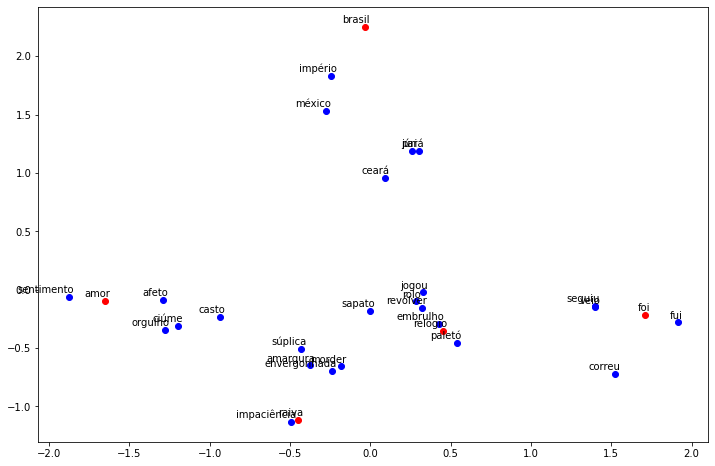

In [158]:
plot_embedding_2d(pca_result,lista,palavras_origem)

#### TSNE
<b> Uma técnica mais recente que captura estrutura não linear é o t-SNE, que significa distribuição estocástica de embedding viziznhos em t ( t-distributed Stochastic Neighbor Embedding). 
É uma ótima técnica para capturar a estrutura não linear em dados de alta dimensão(pelo menos em nível local). Isto é, dois pontos que são próximos no espaço de alta dimensão a probabilidade de estarem próximos em uma dimensão baixa é alta. </b>

Mais informações: https://medium.com/@garora039/dimensionality-reduction-using-t-sne-effectively-cabb2cd519b

<b> Atividade </b>

20) Gere a visualização dos embeddings anteriores utilizando o TSNE para reduzir a dimensionalidade.

Exemplo do TSNE:

```python
#uso de TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=4)
tsne_result =  tsne.fit_transform(array_embeddings)
```

In [159]:
# uso de TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=4)
tsne_result =  tsne.fit_transform(array_embeddings)

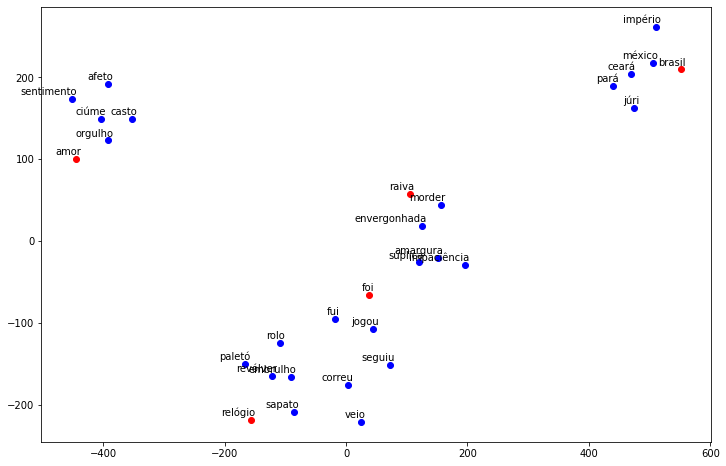

In [160]:
# Uso do TSNE
plot_embedding_2d(tsne_result,lista,palavras_origem) 

#### UMAP

<b> Técnica super nova!! Foi lançada em 2018! Observe que o resultado do UMAP com o TSNE é semelhante. Mas existem várias vantagens do UMAP, por exemplo: é mais rápido que o t-SNE; ele captura melhor a estrutura global </b>

Mais informações: https://medium.com/@dan.allison/dimensionality-reduction-with-umap-b081837354dd

<b> Atividade </b>

21) Gere a visualização dos embeddings anteriores utilizando o UMAP para reduzir a dimensionalidade.

Exemplo do UMAP:

```python
#uso de TSNE
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)
```

In [165]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
import umap.umap_ as umap

In [167]:
# uso de TSNE
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)

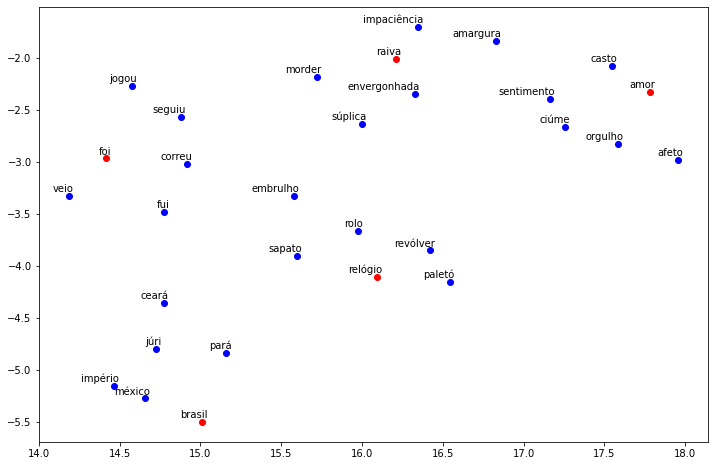

In [168]:
plot_embedding_2d(umap_result,lista,palavras_origem) 